# Preterm Birth Prediction Using EHG

This project is using electrohysterograph data to predict preterm births.

## Data access:  https://physionet.org/content/tpehgdb/1.0.1/tpehgdb/

Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.

Gašper Fele-Žorž, Gorazd Kavšek, Živa Novak-Antolič and Franc Jager. A comparison of various linear and non-linear signal processing techniques to separate uterine EMG records of term and pre-term delivery groups. Medical & Biological Engineering & Computing, 46(9):911-922 (2008).

## Data Description

"The Term-Preterm EHG Database, a collection of electrohysterogram (EHG: uterine EMG) recordings obtained at the University Medical Centre Ljubljana from 300 pregnant women, has been contributed to PhysioNet. The collection includes recordings from 262 women who had full-term pregnancies and 38 whose pregnancies ended prematurely; 162 of the recordings were made before the 26th week of gestation, and 138 later."

Each record is composed of three channels, recorded from 4 electrodes:    - 
the first electrode (E1) was placed 3.5 cm to the left and 3.5 cm above the navel    - ;
the second electrode (E2) was placed 3.5 cm to the right and 3.5 cm above the nave    - l;
the third electrode (E3) was placed 3.5 cm to the right and 3.5 cm below the nav    - el;
the fourth electrode (E4) was placed 3.5 cm to the left and 3.5 cm below the n

The differences in the electrical potentials of the electrodes were recorded, producing 3 channels:

S1 = E2–E1 (first channel);
S2 = E2–E3 (second channel);
S3 = E4–E3 (third channel).
The individual records are 30 minutes in duration. Each signal has been digitized at 20 samples per second per channel with 16-bit resolution over a range of ±2.5 millivolts.

Each signal was digitally filtered using 3 different 4-pole digital Butterworth filters with a double-pass filtering scheme. The band-pass cut-off frequencies were:

from 0.08Hz to 4Hz;
from 0.3Hz to 3Hz;
from 0.3Hz to 4Hz.
The records in the database contain both the original and filtered signals. The records are in WFDB format. Each record consists of two files, a header file (.hea) containing information regarding the record and the data file (.dat) containing signal data.

The comment section in the header files (.hea) includes clinical information, such as:

record number;
pregnancy duration;
gestation duration at the time of recording;
maternal age;
number of previous deliveries (parity);
previous abortions;
weight at the time of recording; *
hypertension; *
diabetes; *
placental position; *
bleeding first trimester; *
bleeding second trimester; *
funneling; *
smoker. *
* These eight items of clinical information were added to the header files in August 2012. No other changes were made.

The signal data in the data files (.dat) are in the following order:

first channel, unfiltered (S1);
first channel, (S1) filtered using a 4-pole band-pass Butterworth filter from 0.08Hz to 4Hz;
first channel, (S1) filtered using a 4-pole band-pass Butterworth filter from 0.3Hz to 3Hz;
first channel, (S1) filtered using a 4-pole band-pass Butterworth filter from 0.3Hz to 4Hz;
second channel, unfiltered (S2);
second channel, (S2) filtered using a 4-pole band-pass Butterworth filter from 0.08Hz to 4Hz;
second channel, (S2) filtered using a 4-pole band-pass Butterworth filter from 0.3Hz to 3Hz;
second channel, (S2) filtered using a 4-pole band-pass Butterworth filter from 0.3Hz to 4Hz;
third channel, unfiltered (S3);
third channel, (S3) filtered using a 4-pole band-pass Butterworth filter from 0.08Hz to 4Hz;
third channel, (S3) filtered using a 4-pole band-pass Butterworth filter from 0.3Hz to 3Hz;
third channel, (S3) filtered using a 4-pole band-pass Butterworth filter from 0.3Hz to 4Hz.
When using filtered channels, note that the first and last 180 seconds of the signals should be ignored since these intervals contain transient effects of the filters.

An accompanying file (tpehgdb.smr) summarizes clinical information of each record, describing whether the corresponding pregnancy ended on term (> 37 weeks) or prematurely (≤ 37 weeks), and whether the record was obtained before the 26th week of gestation or during or after the 26th week of gestation.

The columns in the tpehgdb.smr file represent:

Record - the name of the record;
Gestation - pregnancy duration (in weeks);
Rec. time - gestation duration at the time of recording (in weeks);
Group - record group according to gestation duration at the time of recording (<26 weeks, >=26 weeks) and pregnancy duration (PRE: pre-term, TERM: term);
Premature - true (t), if delivery was premature (before 37 weeks of gestation); false (f), otherwise;
Early - true (t), if the record was obtained before the 26th week of gestation; false (f), otherwise.avel.

Visualize the waveform: https://physionet.org/lightwave/?db=tpehgdb/1.0.1  

## Virtual environment: ehg_preterm   
Best practices is to activate the virtual environment from CLI (see git bash example below)  
Navigate to project directory  
 source ./ehg_preterm/Scripts/activate  
 deactivate  

## Requirements:    
jupyter
pandas  
numpy  
scikit-learn  
matplotlib  
seaborn 
wfdb #for waveform data 
tensorflow

## Import packages

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import seaborn
import wfdb
import os
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Inspect and Import Data 
.dat and .hea files from database tpehgdb

## Examine Header Files

In [97]:
hea_file_path = 'C:/Users/Katie/Desktop/ehg_preterm/tpehgdb/tpehg552'

# Load the HEA file
hea_record = wfdb.rdheader(hea_file_path)

# Display general information about the record
print(f"Record Name: {hea_record.record_name}")
print(f"Number of Channels: {hea_record.n_sig}")
print(f"Sampling Frequency: {hea_record.fs} Hz")
print(f"Signal Labels: {hea_record.sig_name}")
print(f"Comments: {hea_record.comments}")

# Display detailed information about each signal/channel
for i, signal in enumerate(hea_record.sig_name):
    print(f"\nSignal {i + 1} - {signal}")
    print(f"Label: {hea_record.sig_name[i]}")
    print(f"Units: {hea_record.units[i]}")
    print(f"ADC Gain: {hea_record.adc_gain[i]}")
    print(f"ADC Resolution: {hea_record.adc_res[i]}")
    print(f"Baseline: {hea_record.baseline[i]}")


# You can explore other attributes and properties of the hea_record object
# to get more information about the structure of the HEA file.


Record Name: tpehg552
Number of Channels: 12
Sampling Frequency: 20 Hz
Signal Labels: ['1', '1_DOCFILT-4-0.08-4', '1_DOCFILT-4-0.3-3', '1_DOCFILT-4-0.3-4', '2', '2_DOCFILT-4-0.08-4', '2_DOCFILT-4-0.3-3', '2_DOCFILT-4-0.3-4', '3', '3_DOCFILT-4-0.08-4', '3_DOCFILT-4-0.3-3', '3_DOCFILT-4-0.3-4']
Comments: ['Comments:', 'RecID 552', 'Gestation 37', 'Rectime 22.6', 'Age 34', 'Parity 1', 'Abortions 0', 'Weight 68', 'Hypertension no', 'Diabetes no', 'Placental_position front', 'Bleeding_first_trimester no', 'Bleeding_second_trimester no', 'Funneling negative', 'Smoker no']

Signal 1 - 1
Label: 1
Units: mV
ADC Gain: 13107.0
ADC Resolution: 16
Baseline: 0

Signal 2 - 1_DOCFILT-4-0.08-4
Label: 1_DOCFILT-4-0.08-4
Units: mV
ADC Gain: 13107.0
ADC Resolution: 16
Baseline: 0

Signal 3 - 1_DOCFILT-4-0.3-3
Label: 1_DOCFILT-4-0.3-3
Units: mV
ADC Gain: 13107.0
ADC Resolution: 16
Baseline: 0

Signal 4 - 1_DOCFILT-4-0.3-4
Label: 1_DOCFILT-4-0.3-4
Units: mV
ADC Gain: 13107.0
ADC Resolution: 16
Baseline: 0



## Import Data

In [105]:
# Folder containing DAT and HEA files
folder_path = 'C:/Users/Katie/Desktop/ehg_preterm/tpehgdb'

# Initialize lists to store data and headers
data_list = []
headers_list = []

# Iterate through files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".dat"):
        # Extract record name without extension
        record_name = os.path.splitext(filename)[0]

        # Load DAT and HEA files
        dat_record = wfdb.rdsamp(os.path.join(folder_path, record_name))

        # HEA files have the same base name as DAT files
        hea_record_name = record_name
        hea_record_path = os.path.join(folder_path, hea_record_name)

        # Load HEA file
        hea_record = wfdb.rdheader(hea_record_path)
        hea_comments = hea_record.comments

        # Append data and headers to the lists
        data_list.append(dat_record[0])
        headers_list.append({'record_name': record_name, 'hea_comments': hea_comments})

# Convert lists to pandas DataFrame
df = pd.DataFrame({'Record_Name': [item['record_name'] for item in headers_list],
                   'Signal_Data': data_list,
                   'Header_Comments': headers_list})

# Display the DataFrame
print(df)


    Record_Name                                        Signal_Data  \
0     tpehg1007  [[0.08339055466544594, 0.0024414435034714275, ...   
1     tpehg1021  [[-0.07179369802395666, -0.0019073777370870527...   
2     tpehg1022  [[-0.02822919050888838, -0.000686655985351339,...   
3     tpehg1027  [[-0.23994811932555124, -0.005951018539711604,...   
4     tpehg1029  [[0.300526436255436, 0.005722133211261158, 0.0...   
..          ...                                                ...   
295    tpehg962  [[0.11444266422522316, 0.0025177386129549098, ...   
296    tpehg966  [[0.09330891889829862, 0.002670328831921874, 0...   
297    tpehg980  [[-0.023270008392462044, -0.000457770656900892...   
298    tpehg991  [[-0.14656290531776914, -0.0032043945983062485...   
299    tpehg994  [[0.12893873502708478, 0.0032806897077897307, ...   

                                       Header_Comments  
0    {'record_name': 'tpehg1007', 'hea_comments': [...  
1    {'record_name': 'tpehg1021', 'hea_commen

In [106]:
# Check that comments all have the same number of strings (not missing any elements)

# Check if all cells have the same number of strings
same_length = df['Header_Comments'].apply(lambda x: len(x['hea_comments'])).nunique() == 1

if same_length:
    print("All cells have the same number of strings.")
else:
    print("Cells have different numbers of strings.")

df['Header_Comments'].apply(lambda x: len(x['hea_comments']))



All cells have the same number of strings.


0      15
1      15
2      15
3      15
4      15
       ..
295    15
296    15
297    15
298    15
299    15
Name: Header_Comments, Length: 300, dtype: int64

## Expand Comments Column

Comments col is a dictionary with 2 keys. The value of the second key is a list that contains 14 pieces of information. Expand this information so each has its own column.

In [100]:
# Check dictionary length
#keys_length_series = df['Header_Comments'].apply(lambda x: len(x.keys()) if isinstance(x, dict) else None)

# Display the resulting Series
#print(keys_length_series)


In [107]:
# Expand comments into separate columns. First, expand dictionary (2 keys) into 2 new cols.

# Function to expand the dictionary into separate columns
def expand_dict(row):
    return pd.Series(row['Header_Comments'])

# Apply the function to expand the dictionary in each row
expanded_df = df.apply(lambda row: expand_dict(row), axis=1)

# Concatenate the expanded DataFrame with the original DataFrame
df = pd.concat([df, expanded_df], axis=1)

# Drop the original 'Header_Comments' column if needed
df = df.drop('Header_Comments', axis=1)

print(df)



    Record_Name                                        Signal_Data  \
0     tpehg1007  [[0.08339055466544594, 0.0024414435034714275, ...   
1     tpehg1021  [[-0.07179369802395666, -0.0019073777370870527...   
2     tpehg1022  [[-0.02822919050888838, -0.000686655985351339,...   
3     tpehg1027  [[-0.23994811932555124, -0.005951018539711604,...   
4     tpehg1029  [[0.300526436255436, 0.005722133211261158, 0.0...   
..          ...                                                ...   
295    tpehg962  [[0.11444266422522316, 0.0025177386129549098, ...   
296    tpehg966  [[0.09330891889829862, 0.002670328831921874, 0...   
297    tpehg980  [[-0.023270008392462044, -0.000457770656900892...   
298    tpehg991  [[-0.14656290531776914, -0.0032043945983062485...   
299    tpehg994  [[0.12893873502708478, 0.0032806897077897307, ...   

    record_name                                       hea_comments  
0     tpehg1007  [Comments:, RecID 1007, Gestation 35, Rectime ...  
1     tpehg1021  [Com

In [108]:
# Function to expand the list into separate columns

def expand_list(row):
    return pd.Series(row['hea_comments'])

# Apply the function to expand the list in each row
expanded_df2 = df.apply(lambda row: expand_list(row), axis=1)

# Concatenate the expanded DataFrame with the original DataFrame
df = pd.concat([df, expanded_df2], axis=1)

# Drop the original 'Header_Comments' column if needed
df = df.drop('hea_comments', axis=1)

print(df)

    Record_Name                                        Signal_Data  \
0     tpehg1007  [[0.08339055466544594, 0.0024414435034714275, ...   
1     tpehg1021  [[-0.07179369802395666, -0.0019073777370870527...   
2     tpehg1022  [[-0.02822919050888838, -0.000686655985351339,...   
3     tpehg1027  [[-0.23994811932555124, -0.005951018539711604,...   
4     tpehg1029  [[0.300526436255436, 0.005722133211261158, 0.0...   
..          ...                                                ...   
295    tpehg962  [[0.11444266422522316, 0.0025177386129549098, ...   
296    tpehg966  [[0.09330891889829862, 0.002670328831921874, 0...   
297    tpehg980  [[-0.023270008392462044, -0.000457770656900892...   
298    tpehg991  [[-0.14656290531776914, -0.0032043945983062485...   
299    tpehg994  [[0.12893873502708478, 0.0032806897077897307, ...   

    record_name          0           1               2             3  \
0     tpehg1007  Comments:  RecID 1007    Gestation 35  Rectime 31.3   
1     tpehg1021

In [109]:
# Rename columns 

new_names = ['File', 'Signal_Data', 'File_2', 'Comments', 'RecID', 'Pregnancy_duration', 'Preg_length_recording', 'Maternal_age',
            'Parity', 'Abortions', 'Weight', 'Hypertension', 'Diabetes', 'Placental_position', 
            'Bleed_first_tri', 'Bleed_second_tri', 'Funneling', 'Smoker']

df.rename(columns=dict(zip(df.columns, new_names)), inplace=True)
df = df.drop('File_2', axis=1)
df = df.drop('Comments', axis=1)

print(df)




          File                                        Signal_Data       RecID  \
0    tpehg1007  [[0.08339055466544594, 0.0024414435034714275, ...  RecID 1007   
1    tpehg1021  [[-0.07179369802395666, -0.0019073777370870527...  RecID 1021   
2    tpehg1022  [[-0.02822919050888838, -0.000686655985351339,...  RecID 1022   
3    tpehg1027  [[-0.23994811932555124, -0.005951018539711604,...  RecID 1027   
4    tpehg1029  [[0.300526436255436, 0.005722133211261158, 0.0...  RecID 1029   
..         ...                                                ...         ...   
295   tpehg962  [[0.11444266422522316, 0.0025177386129549098, ...   RecID 962   
296   tpehg966  [[0.09330891889829862, 0.002670328831921874, 0...   RecID 966   
297   tpehg980  [[-0.023270008392462044, -0.000457770656900892...   RecID 980   
298   tpehg991  [[-0.14656290531776914, -0.0032043945983062485...   RecID 991   
299   tpehg994  [[0.12893873502708478, 0.0032806897077897307, ...   RecID 994   

    Pregnancy_duration Preg

In [120]:
df['Funneling'].dtype

dtype('O')

## Clean up column entries NOT WQORKING AND IM TRAKING A BREAK

In [ ]:
# Clean up columns further by keeping second item of string when category is repeated 
df_copy = df.copy() 

# List of columns needing to be cleaned up
cols_to_split = ['Pregnancy_duration', 'Preg_length_recording', 'Maternal_age',
            'Parity', 'Abortions', 'Weight', 'Hypertension', 'Diabetes', 'Placental_position', 
            'Bleed_first_tri', 'Bleed_second_tri', 'Funneling', 'Smoker']

# Function to split and keep the second item
def keep_second_item(value):
    if isinstance(value, list) and len(value) == 1:
        items = value[0].split(', ')
        print(f"Original items: {items}")  # Debugging line
        return items[1] if len(items) > 1 else None
    else:
        items = value.split(', ')
        print(f"Original items: {items}")  # Debugging line
        return items[1] if len(items) > 1 else None

# Apply the function to modify the original column in place
for col in cols_to_split:
    df_copy[col] = df_copy[col].apply(keep_second_item)


print(df_copy)



## Expand 12 arrays in Signal_Data each to their own column

In [135]:
folder_path = 'C:/Users/Katie/Desktop/ehg_preterm/tpehgdb'
import os
import wfdb
import pandas as pd
import numpy as np



# Lists to store data and headers
data_list = []
headers_list = []

# Iterate through files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".dat"):
        # Extract record name without extension
        record_name = os.path.splitext(filename)[0]

        # Load DAT and HEA files
        dat_record = wfdb.rdsamp(os.path.join(folder_path, record_name))

        # HEA files have the same base name as DAT files
        hea_record_name = record_name
        hea_record_path = os.path.join(folder_path, hea_record_name)

        # Load HEA file
        hea_record = wfdb.rdheader(hea_record_path)
        hea_comments = hea_record.comments

        # Append data and headers to the lists without processing lengths
        data_list.append(dat_record[0])
        
        # Create a header dictionary for each sensor
        for i, signal_label in enumerate(hea_record.sig_name):
            headers_list.append({
                'record_name': record_name,
                'sensor_label': signal_label,
                'hea_comments': hea_comments
            })

# Determine the maximum length among all data arrays
max_length = max(len(data) for data in data_list)

# Pad or truncate all data arrays to the maximum length
data_list = [np.pad(data, (0, max_length - len(data)), 'constant') for data in data_list]

# Convert lists to pandas DataFrame
df = pd.DataFrame({
    'Record_Name': [item['record_name'] for item in headers_list],
    'Sensor_Label': [item['sensor_label'] for item in headers_list],
    'Signal_Data': data_list,
    'Header_Comments': [item['hea_comments'] for item in headers_list]
})

# Pivot the DataFrame to have each sensor in its own column
df_pivoted = df.pivot_table(index=['Record_Name', 'Header_Comments'], columns='Sensor_Label', values='Signal_Data').reset_index()

# Display the pivoted DataFrame
print(df_pivoted)


ValueError: All arrays must be of the same length

In [119]:
# Some useful code....
#pd.set_option('display.max_colwidth', None)  # Set to none to read entire long entry

#print(df['Header_Comments'])

#pd.set_option('display.max_colwidth', 50)  # Reset to reasonable width

In [4]:
# Examine arrays in Signal_Data
for signal_array in df['Signal_Data']:
    print(signal_array.shape)  # Print the shape of each array

max_length = max(df['Signal_Data'], key=lambda x: x.shape[0]).shape[0]
print("Maximum Length:", max_length)


(35180, 12)
(35260, 12)
(35240, 12)
(35320, 12)
(35280, 12)
(35180, 12)
(35340, 12)
(35340, 12)
(35320, 12)
(35200, 12)
(35280, 12)
(35300, 12)
(35320, 12)
(35220, 12)
(35200, 12)
(35300, 12)
(35320, 12)
(35300, 12)
(35280, 12)
(35280, 12)
(35180, 12)
(35380, 12)
(35200, 12)
(35340, 12)
(35300, 12)
(35260, 12)
(35240, 12)
(35260, 12)
(35220, 12)
(35240, 12)
(35240, 12)
(35360, 12)
(35340, 12)
(35200, 12)
(35360, 12)
(35280, 12)
(35340, 12)
(35200, 12)
(35320, 12)
(35260, 12)
(35360, 12)
(35240, 12)
(35460, 12)
(35320, 12)
(35240, 12)
(35460, 12)
(35340, 12)
(35200, 12)
(35240, 12)
(35240, 12)
(35260, 12)
(35360, 12)
(35460, 12)
(35260, 12)
(35300, 12)
(35240, 12)
(35180, 12)
(35140, 12)
(36000, 12)
(36000, 12)
(35360, 12)
(35280, 12)
(35260, 12)
(36000, 12)
(36000, 12)
(36000, 12)
(35220, 12)
(36000, 12)
(35999, 12)
(36000, 12)
(35999, 12)
(36000, 12)
(35999, 12)
(36000, 12)
(36000, 12)
(36000, 12)
(36000, 12)
(35340, 12)
(35999, 12)
(36000, 12)
(36000, 12)
(36000, 12)
(36000, 12)
(360

In [5]:
df.sample(10)

,Record_Name,Signal_Data,Header_Info
234,tpehg679,"[[-2.0917067215991456, -0.04486152437628748, -...","{'record_name': 'tpehg679', 'hea_record': <wfd..."
153,tpehg1607,"[[-0.641870756084535, -0.016937514305333027, -...","{'record_name': 'tpehg1607', 'hea_record': <wf..."
159,tpehg1626,"[[-0.38574807354848556, -0.008087281605249104,...","{'record_name': 'tpehg1626', 'hea_record': <wf..."
141,tpehg1574,"[[0.324101625085832, 0.007553215838864729, 0.0...","{'record_name': 'tpehg1574', 'hea_record': <wf..."
112,tpehg1478,"[[-0.1006332494087129, -0.0015259021896696422,...","{'record_name': 'tpehg1478', 'hea_record': <wf..."
200,tpehg1756,"[[0.03555352101930266, 0.000686655985351339, 0...","{'record_name': 'tpehg1756', 'hea_record': <wf..."
62,tpehg1273,"[[0.16365300984206912, 0.00473029678797589, 0....","{'record_name': 'tpehg1273', 'hea_record': <wf..."
128,tpehg1526,"[[-0.9588006408789197, -0.02418554970626383, -...","{'record_name': 'tpehg1526', 'hea_record': <wf..."
298,tpehg991,"[[-0.14656290531776914, -0.0032043945983062485...","{'record_name': 'tpehg991', 'hea_record': <wfd..."
263,tpehg814,"[[-0.015259021896696421, -0.000381475547417410...","{'record_name': 'tpehg814', 'hea_record': <wfd..."


In [6]:
consistent_first_dimension = all(arr.shape[0] == 39873 for arr in df['Signal_Data'])
print(f"First dimension consistent: {consistent_first_dimension}")

consistent_second_dimension = all(arr.shape[1] == 12 for arr in df['Signal_Data'])
print(f"Second dimension consistent: {consistent_second_dimension}")


First dimension consistent: False
Second dimension consistent: True


# Data Preprocessing

This data is currently present in 12 arrays (representing 12 sensors) and consists of 3xxx samples (probably).  

Need to import all info from hea file, currently missing info
Need to look into padding the arrays so that equal length input is provided into models. 
Need to decide if padding should occur before or after expanding channels, and if channels should even be expanded. 

# Data Visualization


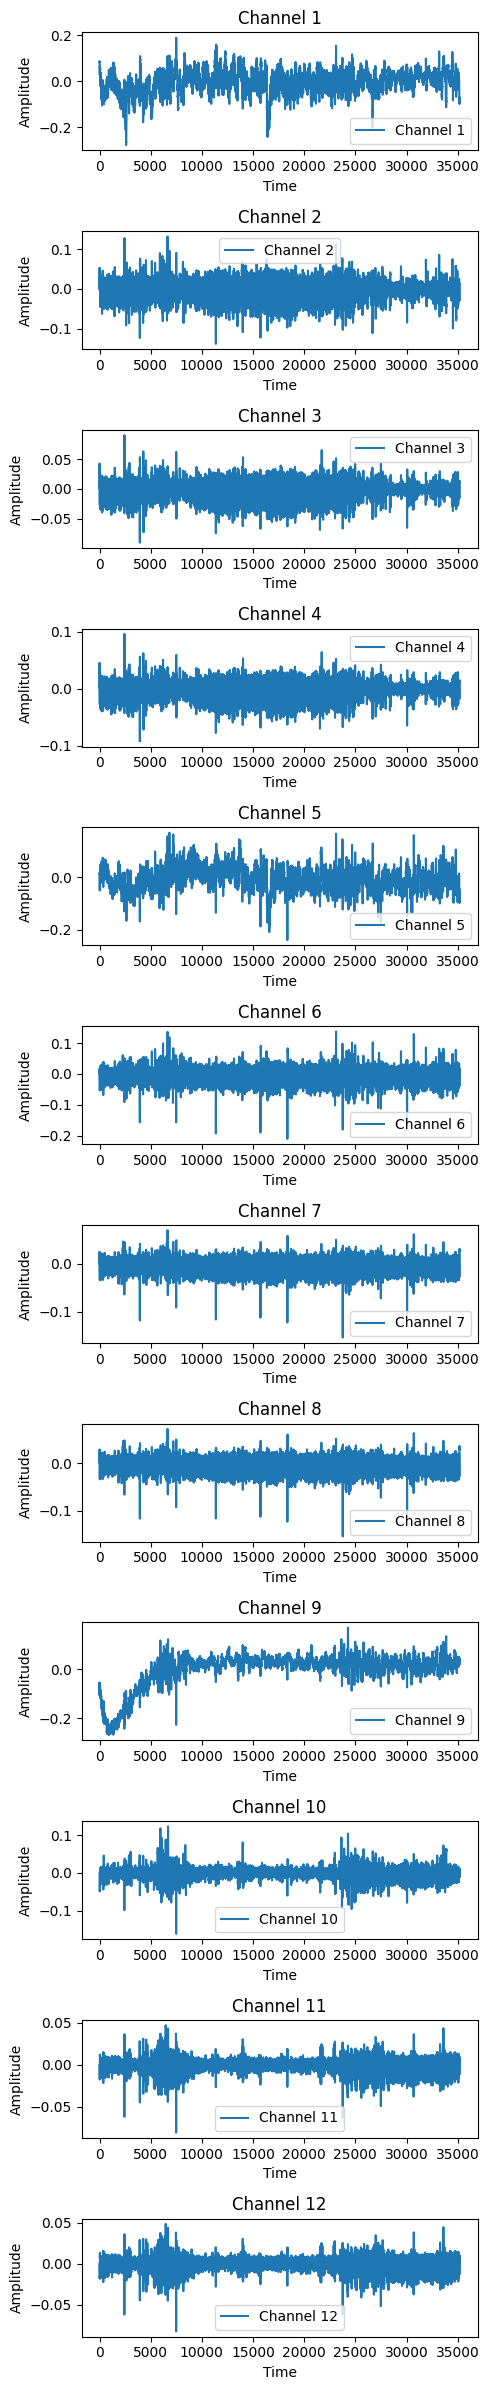

In [7]:
import matplotlib.pyplot as plt

# Specify the index of the row you want to visualize
row_index = 0  # Change this to the index of the desired row

# Access the 'Signal_Data' column for the specified row
signal_data = df.loc[row_index, 'Signal_Data']

# Get the number of channels
num_channels = signal_data.shape[1]

# Create subplots for each channel
fig, axs = plt.subplots(num_channels, 1, figsize=(5, 2*num_channels))

# Plot each channel separately
for i in range(num_channels):
    axs[i].plot(signal_data[:, i], label=f'Channel {i+1}')
    axs[i].set_title(f'Channel {i+1}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Amplitude')
    axs[i].legend()

plt.tight_layout()
plt.show()



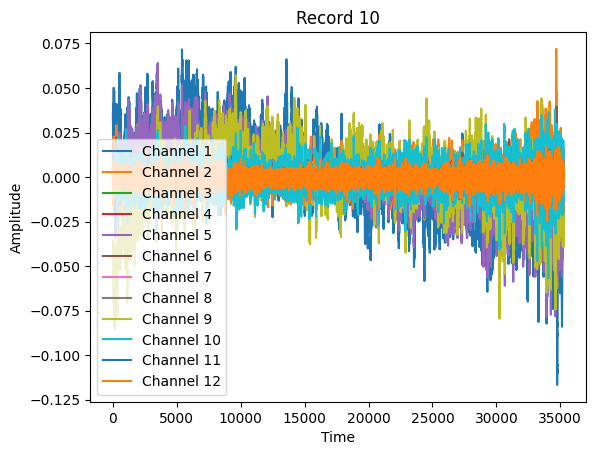

In [8]:
import matplotlib.pyplot as plt

# Specify the index of the row you want to visualize
row_index = 10  # Change this to the index of the desired row

# Access the 'Signal_Data' column for the specified row
signal_data = df.loc[row_index, 'Signal_Data']

# Plot each channel separately
for i in range(signal_data.shape[1]):
    plt.plot(signal_data[:, i], label=f'Channel {i+1}')

plt.title(f'Record {row_index}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


# Topological Data Analysis

What kind of input data?
